In [14]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [15]:
#download data
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2020-06-25 18:33:06--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2020-06-25 18:33:06 (780 MB/s) - ‘drug200.csv’ saved [6027/6027]



In [16]:
# reading data from csv
data=pd.read_csv('/content/drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [17]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0832692eb8>,
      dtype=object)

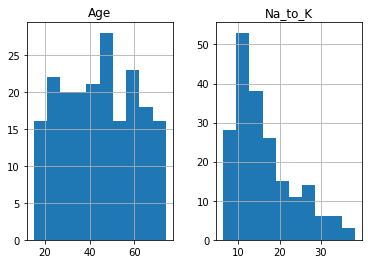

In [18]:
data.hist()

In [19]:
data.shape

(200, 6)

In [40]:
x = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

y= data['Drug']
data.groupby(y).sum()

,Age,Na_to_K
Drug,,
drugA,825,251.132
drugB,1000,184.390
drugC,680,170.140
drugX,2377,575.130
drugY,3981,2036.105


In [41]:
x[:,1]

array(['F', 'M', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'F', 'M',
       'F', 'F', 'F', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'F', 'F', 'F',
       'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'F',
       'M', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'F', 'M',
       'M', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'F',
       'F', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'F',
       'F', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M',
       'M', 'F', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'M',
       'F', 'F', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'F',
       'F', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M',
       'M', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F', 'M', 'M',
       'M', 'M', 'F', 'F', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'F', 'F',
       'F', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'M', 'F', 'F

**Data Preprocessing**

In [42]:
#converting category to numerical
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_sex.fit(['F','M'])
x[:,1] = le_sex.transform(x[:,1]) 


le_BP = LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
x[:,2] = le_BP.transform(x[:,2])


le_Chol = LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
x[:,3] = le_Chol.transform(x[:,3]) 


In [43]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [47]:
# model creation
from sklearn.metrics import accuracy_score
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(accuracy_score(ytest,ypred))


1.0


In [48]:
from sklearn import metrics
import matplotlib.pyplot as plt

DecisionTrees's Accuracy:  1.0
